In [ ]:
%pip install pandas
%pip install numpy
%pip install matplotlib

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import dataset
(https://www.kaggle.com/c/house-prices-advanced-regression-techniques/datahttps://www.kaggle.com/c/house-prices-advanced-regression-techniques/data)

In [11]:
dataframe = pd.read_csv("housing_data.csv")

print(dataframe.shape,"\n")

dataframe.info()

(1460, 81) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  


## Resize the dataframe

In [12]:
numerical_features = ["SalePrice", "LotArea", "OverallQual",
                      "OverallCond", "YearBuilt", "1stFlrSF",
                      "2ndFlrSF", "BedroomAbvGr"]

# SalePrice - the property's sale price in dollars
# LotArea - lot size in square feet
# OverallQual: Overall material and finish quality
# OverallCond: Overall condition rating
# YearBuilt: Original construction date
# 1stFlrSF: First Floor square feet
# 2ndFlrSF: Second floor square feet
# BedroomAbvGr: Total rooms above grade (does not include bathrooms)

categorical_features = ["MSZoning", "LotShape",
                        "Neighborhood", "CentralAir",
                        "SaleCondition", "MoSold", "YrSold"]

# MSZoning: The general zoning classification
# LotShape: General shape of property
# Neighborhood: Physical locations within Ames city limits
# CentralAir: Central air conditioning
# SaleCondition: Condition of sale
# MoSold: Month Sold
# YrSold: Year Sold

# Select only the required columns
dataframe = dataframe[numerical_features + categorical_features]

print(dataframe.shape, "\n")

dataframe.info()

(1460, 15) 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   SalePrice      1460 non-null   int64 
 1   LotArea        1460 non-null   int64 
 2   OverallQual    1460 non-null   int64 
 3   OverallCond    1460 non-null   int64 
 4   YearBuilt      1460 non-null   int64 
 5   1stFlrSF       1460 non-null   int64 
 6   2ndFlrSF       1460 non-null   int64 
 7   BedroomAbvGr   1460 non-null   int64 
 8   MSZoning       1460 non-null   object
 9   LotShape       1460 non-null   object
 10  Neighborhood   1460 non-null   object
 11  CentralAir     1460 non-null   object
 12  SaleCondition  1460 non-null   object
 13  MoSold         1460 non-null   int64 
 14  YrSold         1460 non-null   int64 
dtypes: int64(10), object(5)
memory usage: 171.2+ KB


## Plotting

In [15]:
# Print a table with some statistics for the numerical features
# such as count, mean, std, min, 25%, 50%, 75%, max
dataframe[numerical_features].describe()

,SalePrice,LotArea,OverallQual,OverallCond,YearBuilt,1stFlrSF,2ndFlrSF,BedroomAbvGr
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,10516.828082,6.099315,5.575342,1971.267808,1162.626712,346.992466,2.866438
std,79442.502883,9981.264932,1.382997,1.112799,30.202904,386.587738,436.528436,0.815778
min,34900.000000,1300.000000,1.000000,1.000000,1872.000000,334.000000,0.000000,0.000000
25%,129975.000000,7553.500000,5.000000,5.000000,1954.000000,882.000000,0.000000,2.000000
50%,163000.000000,9478.500000,6.000000,5.000000,1973.000000,1087.000000,0.000000,3.000000
75%,214000.000000,11601.500000,7.000000,6.000000,2000.000000,1391.250000,728.000000,3.000000
max,755000.000000,215245.000000,10.000000,9.000000,2010.000000,4692.000000,2065.000000,8.000000


array([[<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'LotArea'}>],
       [<Axes: title={'center': 'OverallQual'}>,
        <Axes: title={'center': 'OverallCond'}>],
       [<Axes: title={'center': 'YearBuilt'}>,
        <Axes: title={'center': '1stFlrSF'}>],
       [<Axes: title={'center': '2ndFlrSF'}>,
        <Axes: title={'center': 'BedroomAbvGr'}>]], dtype=object)

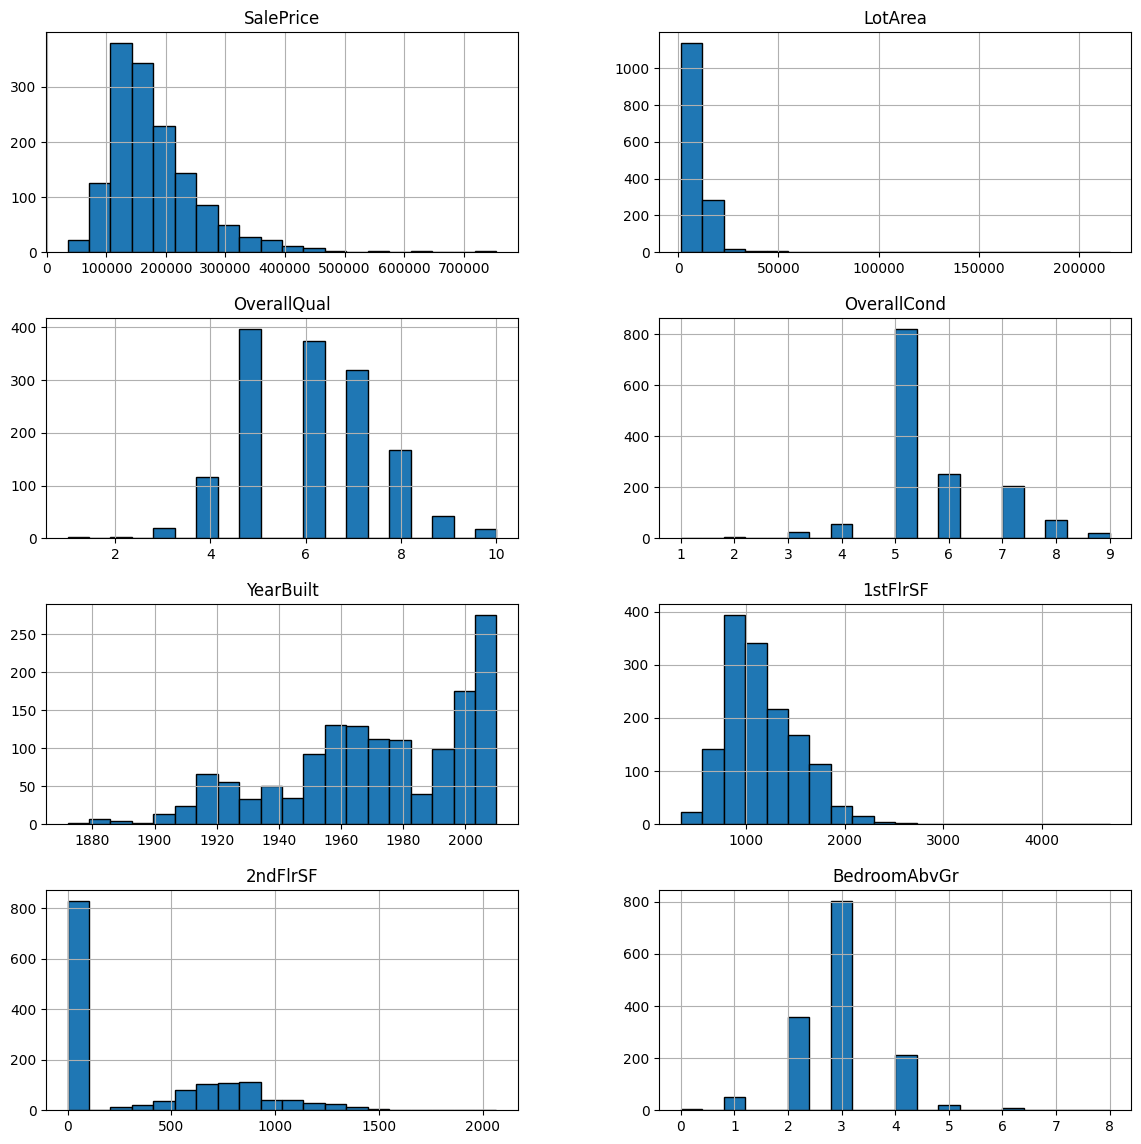

In [17]:
# Print some histograms plots for the numerical features
dataframe[numerical_features].hist(edgecolor="black",
                                   bins=20,
                                   figsize=(14, 14),
                                   layout=(4,2))

<Axes: title={'center': 'MSZoning'}, xlabel='MSZoning'>

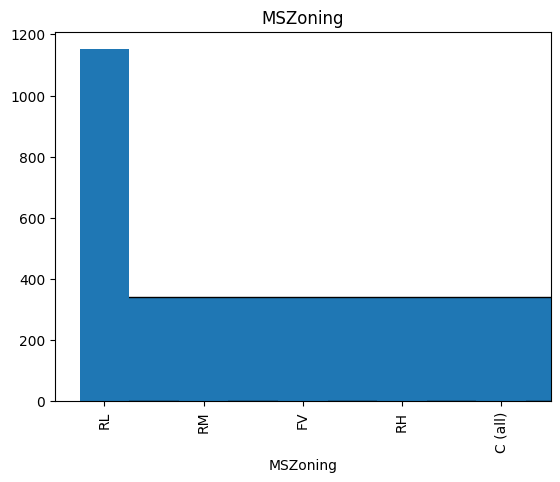

In [19]:
# Calculate the age of each house when it was sold by subtracting year built from year sold
dataframe["AgeWhenSold"] = dataframe["YrSold"] - dataframe["YearBuilt"]

# Add the new column to the list of numerical features for tracking
numerical_features.append("AgeWhenSold")

# Create a histogram showing the distribution of house ages at time of sale
dataframe["AgeWhenSold"].hist(edgecolor="black",
                              bins=20)

# Create a bar chart showing the frequency of different zoning classifications
dataframe["MSZoning"].value_counts().plot(kind="bar",
                                          title="MSZoning")

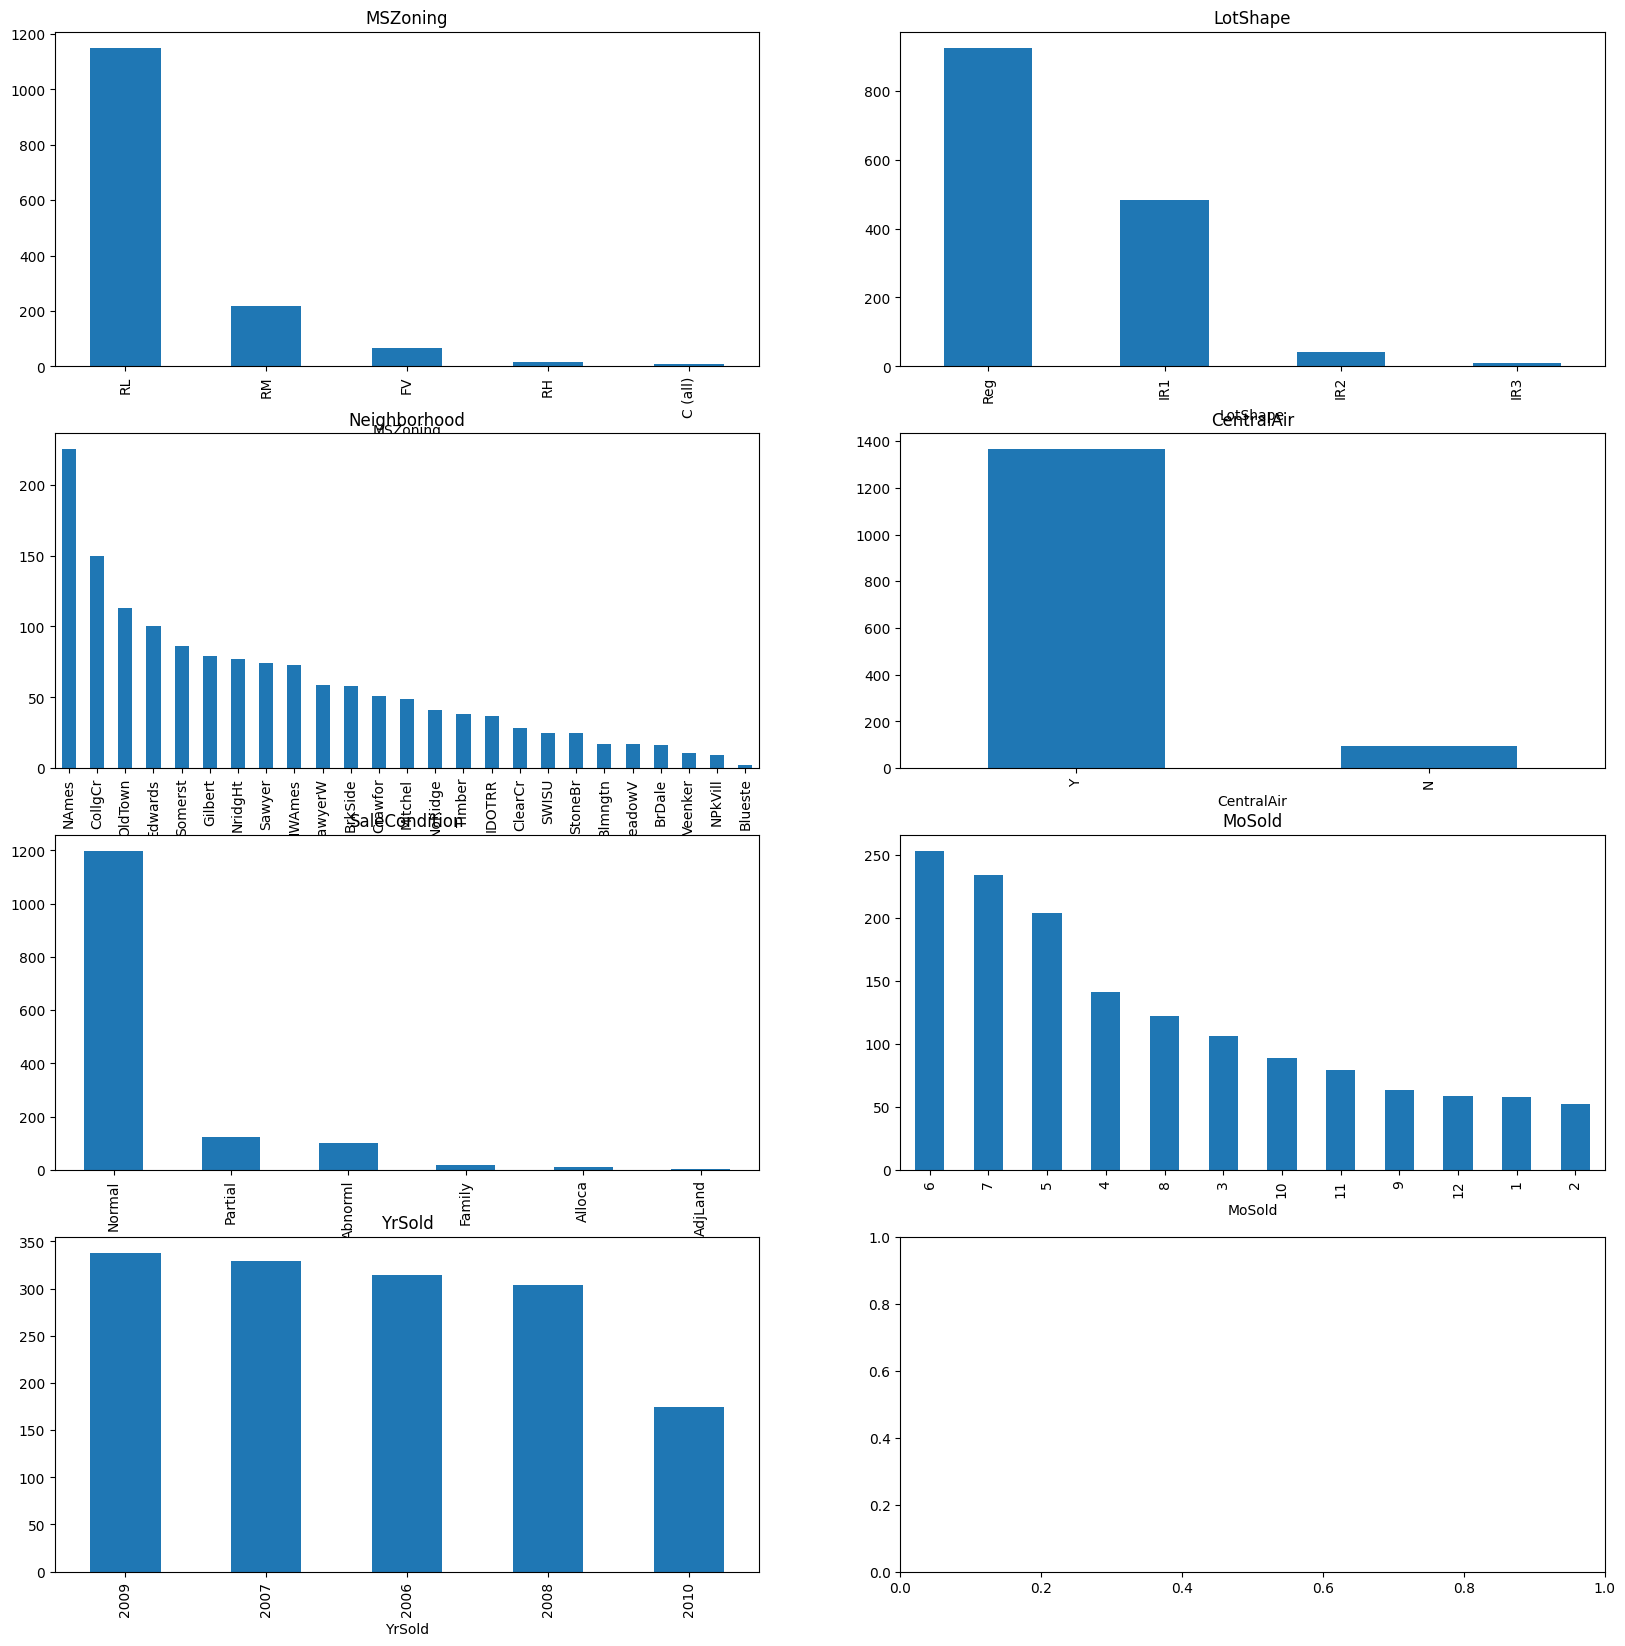

In [21]:
# Create a grid of bar charts (4 rows, 2 columns) showing the distribution 
# of each categorical feature in the dataset
figure, axis = plt.subplots(4, 2, figsize=(20, 20))

# For each categorical feature, create a bar chart in its corresponding subplot
for feature, subplot in zip(categorical_features, axis.flatten()):
  
  dataframe[feature].value_counts().plot(kind="bar",
                                         ax=subplot,
                                         title=feature)